In [52]:
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
plt.rcParams['figure.figsize'] = (12,5)
from scipy import signal
from IPython.display import Audio
from scipy.io.wavfile import read

# Data Preprocessing 

In [53]:
#Load Files
#Wav is a file located in the same directory as the original Keyfinding Audio files with only .wav files selected
import os, librosa
path = '/Users/chenzuyu/Documents/AT2Material/HWK/Final_Project/Keyfinding/Keyfinding_Audio/Wav'

for (root,dirs,files) in os.walk(path):
    print(f'there are {len(files)} files.') 
    data = []
    key = []
    #print(type(files))
    for file in files:
        x, sr = librosa.load('Keyfinding/Keyfinding_Audio/Wav/' + file) #sr = 22050 by default
        data.append(x)
        key.append(file.split('_')[-1].split('.')[0])
data = np.array(data, dtype=object)
keys = np.array(key, dtype=object)
print('data.shape:', data.shape) 

there are 94 files.
data.shape: (94,)


In [54]:
#Make a DataFram for files and the key of each
Title_Key = dict(zip(files,keys)) # Make a dictionary in the form of {'Title:' Key}
df = pd.DataFrame(Title_Key.items(), columns = ['Title', 'Key'])
df

,Title,Key
0,K280Allegro_F.wav,F
1,0023_E.wav,E
2,0018_C.wav,C
3,BeethovenStringquartet10Mvt1_Eb.wav,Eb
4,0064_G.wav,G
...,...,...
89,0030_Ab.wav,Ab
90,0056_Bb.wav,Bb
91,Little-Prelude-in-E-Major-BWV-937_Bach-Johann-...,E
92,Little-Prelude-in-F-Major-BWV-928_Bach-Johann-...,F


In [55]:
# Pass audio data to the DataFrame as a new column
#data[0]
df['Data'] = data
df.head()

,Title,Key,Data
0,K280Allegro_F.wav,F,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,0023_E.wav,E,"[1.0670851e-05, 1.2184786e-05, 1.1755048e-06, ..."
2,0018_C.wav,C,"[-1.5300528e-05, -2.0294325e-05, -2.0983676e-0..."
3,BeethovenStringquartet10Mvt1_Eb.wav,Eb,"[3.0383717e-06, -2.6514817e-06, 3.879533e-06, ..."
4,0064_G.wav,G,"[-2.3954233e-06, 3.144546e-06, -4.619492e-06, ..."


Now, let's look into Pitch Class Profile for 24 keys (major and minor) as derived by Krumhansl and Kessler

# Pitch Class Profile

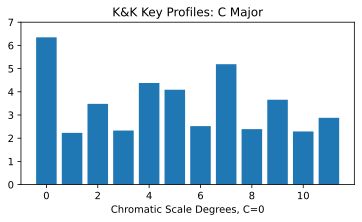

In [57]:
#Pitch Class Profile:
#CMajor:
major_0 = np.array([6.35,2.23,3.48,2.33,4.38,4.09,2.52,5.19,2.39,3.66,2.29,2.88])#values: C,C#,D,D#,...B
major_0_freqInd = np.argsort(major_0)
#CMinor:
minor_0 = np.array([6.33,2.68,3.52,5.38,2.60,3.53,2.54,4.75,3.98,2.69,3.34,3.17]) #values: C,C#,D,D#,...B

#Plot CMajor pitch class profile
plt.figure(figsize=(6,3))
scaledegs = list(range(0,12))
plt.bar(scaledegs, major_0)
plt.ylim((0,7))
plt.title('K&K Key Profiles: C Major')
plt.xlabel('Chromatic Scale Degrees, C=0')
plt.show()

To get the values for every major key, we need to shift (or rotate) all the chromatic values by 1 semitone. (E.g., C# major will have "do" equal to "C#")

In [58]:
arraysDict = {}
for i in range(0,12):
    arraysDict['major_{0}'.format(i)] = np.roll(major_0,i)#iteratively create each label while rotating
    arraysDict['minor_{0}'.format(i)] = np.roll(minor_0,i)#np.roll is a handy shifting/rotating function
index = ['C', 'C#/Db', 'D', 'D#/Eb', 'E', 'F', 'F#/Gb', 'G', 'G#/Ab', "A", 'A#/Bb', 'B']
pd.DataFrame(arraysDict, index = index)

,major_0,minor_0,major_1,minor_1,major_2,minor_2,major_3,minor_3,major_4,minor_4,...,major_7,minor_7,major_8,minor_8,major_9,minor_9,major_10,minor_10,major_11,minor_11
C,6.35,6.33,2.88,3.17,2.29,3.34,3.66,2.69,2.39,3.98,...,4.09,3.53,4.38,2.60,2.33,5.38,3.48,3.52,2.23,2.68
C#/Db,2.23,2.68,6.35,6.33,2.88,3.17,2.29,3.34,3.66,2.69,...,2.52,2.54,4.09,3.53,4.38,2.60,2.33,5.38,3.48,3.52
D,3.48,3.52,2.23,2.68,6.35,6.33,2.88,3.17,2.29,3.34,...,5.19,4.75,2.52,2.54,4.09,3.53,4.38,2.60,2.33,5.38
D#/Eb,2.33,5.38,3.48,3.52,2.23,2.68,6.35,6.33,2.88,3.17,...,2.39,3.98,5.19,4.75,2.52,2.54,4.09,3.53,4.38,2.60
E,4.38,2.60,2.33,5.38,3.48,3.52,2.23,2.68,6.35,6.33,...,3.66,2.69,2.39,3.98,5.19,4.75,2.52,2.54,4.09,3.53
F,4.09,3.53,4.38,2.60,2.33,5.38,3.48,3.52,2.23,2.68,...,2.29,3.34,3.66,2.69,2.39,3.98,5.19,4.75,2.52,2.54
F#/Gb,2.52,2.54,4.09,3.53,4.38,2.60,2.33,5.38,3.48,3.52,...,2.88,3.17,2.29,3.34,3.66,2.69,2.39,3.98,5.19,4.75
G,5.19,4.75,2.52,2.54,4.09,3.53,4.38,2.60,2.33,5.38,...,6.35,6.33,2.88,3.17,2.29,3.34,3.66,2.69,2.39,3.98
G#/Ab,2.39,3.98,5.19,4.75,2.52,2.54,4.09,3.53,4.38,2.60,...,2.23,2.68,6.35,6.33,2.88,3.17,2.29,3.34,3.66,2.69
A,3.66,2.69,2.39,3.98,5.19,4.75,2.52,2.54,4.09,3.53,...,3.48,3.52,2.23,2.68,6.35,6.33,2.88,3.17,2.29,3.34


Next, we compute chromagrams for all our audio file data 

# Feature Extraction and Prediction
 Compute chromagram and correlation coefficients

In [59]:
#Chromagram Feature:
from librosa import feature
pred_key = []
chroma_mean = []
for d in data:  
    chroma = feature.chroma_stft(d, n_fft=1024) #By default librosa.feature.chroma_stft function returns
                                                #NORMALIZED energy distribution across 12 pitch classes
                                                #So there shouldn't be need to normalize audio files before doing stft in this case
    avg = chroma.mean(axis = 1)
    chroma_mean.append(avg)
    #print(avg_chroma.shape)
    
    
    #Template matching with correlation coefficients
    #The predicted value will be the one that yields the correlation coeff
    coeff = {}
    for key, value in arraysDict.items():
        r = np.corrcoef([avg, value])
        coeff[key] = r[0][1] # create a dictionary for each correlation coeff against 24 key profiles 
    #print(coeff)
    
    sorted_coeff = sorted(coeff, key=coeff.get) #sort dictionary by values in increasing order
    #print('\n') 
    #print('sorted_coeff:\n', sorted_coeff[::-1])
    prediction = sorted_coeff[-1] #The prediction is the last one along the increasing order (max)
    pred_key.append(prediction)
    
print('done')

done


In [60]:
chroma_mean_arr = np.array(chroma_mean) 
chroma_mean_arr.shape

(94, 12)

In [61]:
#Add chroma_mean_arr as multiple columns(12) to DataFrame
for i in range(12):
    df[f'c{i}'] = chroma_mean_arr[:,i]
df.head()

,Title,Key,Data,c0,c1,c2,c3,c4,c5,c6,c7,c8,c9,c10,c11
0,K280Allegro_F.wav,F,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.326079,0.246427,0.241933,0.212842,0.323535,0.395658,0.213032,0.235383,0.182757,0.233670,0.250460,0.256639
1,0023_E.wav,E,"[1.0670851e-05, 1.2184786e-05, 1.1755048e-06, ...",0.397782,0.403121,0.363362,0.404469,0.590385,0.520026,0.468201,0.445265,0.489859,0.474441,0.388866,0.469744
2,0018_C.wav,C,"[-1.5300528e-05, -2.0294325e-05, -2.0983676e-0...",0.614218,0.387756,0.398889,0.398657,0.429898,0.376352,0.344908,0.584789,0.421455,0.356268,0.344293,0.388473
3,BeethovenStringquartet10Mvt1_Eb.wav,Eb,"[3.0383717e-06, -2.6514817e-06, 3.879533e-06, ...",0.284921,0.290659,0.413921,0.391975,0.351626,0.367563,0.318743,0.348485,0.352608,0.374300,0.467303,0.299178
4,0064_G.wav,G,"[-2.3954233e-06, 3.144546e-06, -4.619492e-06, ...",0.511661,0.414662,0.407344,0.358220,0.366962,0.350636,0.415155,0.452143,0.400474,0.445909,0.447387,0.513105


In [100]:
pred_key[:5]

['major_5', 'major_4', 'major_0', 'major_10', 'major_7']

Now that the pred_key is in the form of 'major_i', we need to conver it to key letter, like "C#/Db"

In [62]:
#Create a dictionary for key values
value= ['C', 'c', 'C#/Db', 'c#/db', 'D', 'd', 'D#/Eb', 'd#/eb', 'E', 'e',
        'F','f', 'F#/Gb', 'f#/gb','G','g', 'G#/Ab','g#/ab', 'A', 'a','A#/Bb','a#/bb', 'B', 'b']
dict_key = {}
for i in range(12):
    dict_key['major_{0}'.format(i)]  = value[2*i]
    dict_key['minor_{0}'.format(i)]  = value[2*i+1]
dict_key

{'major_0': 'C',
 'minor_0': 'c',
 'major_1': 'C#/Db',
 'minor_1': 'c#/db',
 'major_2': 'D',
 'minor_2': 'd',
 'major_3': 'D#/Eb',
 'minor_3': 'd#/eb',
 'major_4': 'E',
 'minor_4': 'e',
 'major_5': 'F',
 'minor_5': 'f',
 'major_6': 'F#/Gb',
 'minor_6': 'f#/gb',
 'major_7': 'G',
 'minor_7': 'g',
 'major_8': 'G#/Ab',
 'minor_8': 'g#/ab',
 'major_9': 'A',
 'minor_9': 'a',
 'major_10': 'A#/Bb',
 'minor_10': 'a#/bb',
 'major_11': 'B',
 'minor_11': 'b'}

In [63]:
keyValue = [dict_key[p] for p in pred_key]
df['Prediction'] = keyValue
df.head()

,Title,Key,Data,c0,c1,c2,c3,c4,c5,c6,c7,c8,c9,c10,c11,Prediction
0,K280Allegro_F.wav,F,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.326079,0.246427,0.241933,0.212842,0.323535,0.395658,0.213032,0.235383,0.182757,0.233670,0.250460,0.256639,F
1,0023_E.wav,E,"[1.0670851e-05, 1.2184786e-05, 1.1755048e-06, ...",0.397782,0.403121,0.363362,0.404469,0.590385,0.520026,0.468201,0.445265,0.489859,0.474441,0.388866,0.469744,E
2,0018_C.wav,C,"[-1.5300528e-05, -2.0294325e-05, -2.0983676e-0...",0.614218,0.387756,0.398889,0.398657,0.429898,0.376352,0.344908,0.584789,0.421455,0.356268,0.344293,0.388473,C
3,BeethovenStringquartet10Mvt1_Eb.wav,Eb,"[3.0383717e-06, -2.6514817e-06, 3.879533e-06, ...",0.284921,0.290659,0.413921,0.391975,0.351626,0.367563,0.318743,0.348485,0.352608,0.374300,0.467303,0.299178,A#/Bb
4,0064_G.wav,G,"[-2.3954233e-06, 3.144546e-06, -4.619492e-06, ...",0.511661,0.414662,0.407344,0.358220,0.366962,0.350636,0.415155,0.452143,0.400474,0.445909,0.447387,0.513105,G


In [64]:
np.array(df.Key)

array(['F', 'E', 'C', 'Eb', 'G', 'G', 'C', 'a', 'Bb', 'C', 'C', 'C', 'F',
       'c', 'g', 'a', 'd', 'Ab', 'e', 'D', 'Eb', 'e', 'C', 'a', 'b', 'C',
       'E', 'E', 'G', 'A', 'E', 'B', 'Bb', 'G', 'Ab', 'Eb', 'e', 'd', 'F',
       'G', 'd', 'G', 'C', 'G', 'd', 'F', 'e', 'c', 'A', 'C', 'g', 'a',
       'Db', 'D', 'Eb', 'g', 'Eb', 'C', 'C', 'A', 'a', 'c', 'Eb', 'Eb',
       'D', 'a', 'E', 'a', 'A', 'C', 'D', 'Eb', 'a', 'Eb', 'F', 'C', 'C',
       'F', 'Ab', 'c#', 'd', 'G', 'G', 'Db', 'a', 'e', 'Eb', 'E', 'c',
       'Ab', 'Bb', 'E', 'F', 'a'], dtype=object)

Note: some values in df['Key'] while refering to the same keys as the corresponding ones in dic_Key couldn't be identified, e.g., 'Eb' in df['Key'] couldnt' be identified as the 'D#/Eb' via dict_Key. So we need to merge such values to make it recognizable with dictionary

In [67]:
#For time saving purposes, here I've identified all the chromatic keys existing in all file key labels
#, so I'm kind of 'hard-coded' to convert those chromatic key labels to the corresponding ones in dic_Key.
#Ideally, you would have to test the iteration of key labels through all chromatic keys 

for key, i in zip(df['Key'], range(len(data))):
    if key == 'Eb':
        df['Key'][i] = 'D#/Eb'
    elif key == 'Ab':
        df['Key'][i] = 'G#/Ab'
    elif key == 'Db':
        df['Key'][i] = 'C#/Db'
    elif key == 'Bb':
        df['Key'][i] = 'A#/Bb'
    elif key == 'c#':
        df['Key'][i] = 'c#/db'


In [66]:
df.head()

,Title,Key,Data,c0,c1,c2,c3,c4,c5,c6,c7,c8,c9,c10,c11,Prediction
0,K280Allegro_F.wav,F,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.326079,0.246427,0.241933,0.212842,0.323535,0.395658,0.213032,0.235383,0.182757,0.233670,0.250460,0.256639,F
1,0023_E.wav,E,"[1.0670851e-05, 1.2184786e-05, 1.1755048e-06, ...",0.397782,0.403121,0.363362,0.404469,0.590385,0.520026,0.468201,0.445265,0.489859,0.474441,0.388866,0.469744,E
2,0018_C.wav,C,"[-1.5300528e-05, -2.0294325e-05, -2.0983676e-0...",0.614218,0.387756,0.398889,0.398657,0.429898,0.376352,0.344908,0.584789,0.421455,0.356268,0.344293,0.388473,C
3,BeethovenStringquartet10Mvt1_Eb.wav,D#/Eb,"[3.0383717e-06, -2.6514817e-06, 3.879533e-06, ...",0.284921,0.290659,0.413921,0.391975,0.351626,0.367563,0.318743,0.348485,0.352608,0.374300,0.467303,0.299178,A#/Bb
4,0064_G.wav,G,"[-2.3954233e-06, 3.144546e-06, -4.619492e-06, ...",0.511661,0.414662,0.407344,0.358220,0.366962,0.350636,0.415155,0.452143,0.400474,0.445909,0.447387,0.513105,G


Write all information including features, prediction and labels into a single csv file and save in the directory. So that next time we just start form reading all information we need into a DataFrame and train model through it.

In [68]:
#Write all the information into a single csv file
csv = df.to_csv(index=False)
with open('Title_Key_Data_Feature_Pred.csv', 'w') as f:
    f.write(csv)  